# Recursion (and a little bit of caching)

### What is recursion?
* Repeatedly applying the same procedure to solve a problem

### Why is it useful?
* Can replace for or while loops in your code
* Makes code more efficient and elegant

### How do I solve a problem recursively?
1. Find your "base case"
2. Take a "little step" towards solving the problem
3. Call your recursive function again after taking your "little step"

### Examples?
* Compute the factorial of a number
* Raise a number to the *kth* power
* Find elements of the fibonacci sequence

## Let's solve a problem using recursion

In [1]:
### Write a function that accepts a single integer from the client and returns its factorial ###

### How would we write this using loops? ###

def factorial_while(n):
    curr_product = 1
    while n>0:
        curr_product = curr_product*n
        n -= 1
    return curr_product

def factorial_for(n):
    curr_product = 1
    for i in range(1,n+1):
        curr_product *= i
    return curr_product

### Now use recursion, no loops!!! ###

def factorial(n):
    # What's our "base case"?
    if n == 0:
        return 1
    # Take a "little step" towards solving the problem
    else:
        return n*factorial(n-1) # Call the recursive function again after taking our "little step"

In [4]:
# Let's check our work
i = 6
print(factorial_while(i), factorial_for(i), factorial(i))

720 720 720


## Let's solve another problem using recursion

In [5]:
### Write a function that computes the kth power of a given number ###

def power(n, k):
    # What's our base case?
    if k == 0:
        return 1
    # Take a "little step" towards solving the problem
    else:
        return n*power(n, k-1)

In [8]:
# Let's check our work
n = 3
k = 5
print(power(n, k))

243


## Let's try one more problem using recursion

In [15]:
### Write a fucntion that reverses a string recursively. i.e. given "physics" returns "scisyhp"

def reverse_str(string):
    # What's our "base case"
    if string == None or string == "":
        return string
    # Take a "little step" towards solving the problem
    else:
        return reverse_str(string[1:]) + string[0]

In [16]:
print(reverse_str("physics"))

scisyhp


## Beware! Don't get trapped in *infinite recursion* 

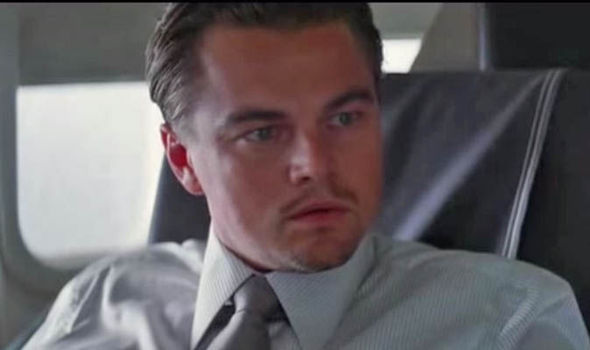

In [41]:
from IPython.display import Image
Image("inception.jpg")

### Happens when never hit your base case.
* If this happens to you, make sure your base case is correct and that your "little step" is "big enough" and/or correct

## Recursion and Caching
#### Recursion sounds great but it sure does seem like we make a lot of calls to the recursive function. 

In [17]:
### Take our factorial function for example ###

def factorial(n):
    # What's our "base case"?
    if n == 0:
        return 1
    # Take a "little step" towards solving the problem
    else:
        print("Recursive call being made")
        return n*factorial(n-1) # Call the recursive function again after taking our "little step"

In [21]:
factorial(10)

Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made
Recursive call being made


3628800

### Is there a way to be more efficient? 
#### What if we stored intermediate values that we calculate so we can just look them up if they're called again instead of calculating them twice

In [38]:
### Need a Global variable here so we can keep track of it across multiple calls ###
global fact_cache 
fact_cache = {} # Will use a dictionary (kind of like a hash map, quick and easy way to look up values for keys)
def factorial_cache(n):
    # What's our "base case"?
    if n == 0:
        return 1
    # Check if we've already stored the result for n in our cache
    elif n in fact_cache:
        return fact_cache.get(n)
    # Take a "little step" towards solving the problem
    else:
        print("Recursive call being made")
        x = n*factorial_cache(n-1) # Call the recursive function again after taking our "little step"
        fact_cache[n] = x
        return x

In [40]:
factorial_cache(3)

6